# 전처리

1. 결측치 처리
- test 셋의 `자격유형` 결측치 처리
- train 셋의 `10분내버스정류장수` 결측치 처리

2. 라벨 인코딩 + 원핫 인코딩

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

warnings.filterwarnings(action='ignore')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False

In [2]:
path = './data/'

os.listdir(path)

['age_gender_info.csv',
 '.DS_Store',
 'test_df.csv',
 'test.csv',
 'test_preprocessed.csv',
 'train_errx_preprocessed.csv',
 'train_df_errx.csv',
 'train.csv',
 'train_preprocessed.csv',
 'train_df.csv',
 'sample_submission.csv']

In [3]:
train = pd.read_csv(path + "train_df.csv")
train_errx = pd.read_csv(path + 'train_df_errx.csv')
test = pd.read_csv(path + "test_df.csv")

train.shape, test.shape, train_errx.shape

((2952, 15), (1008, 14), (2896, 15))

In [4]:
# 지하철수, 버스정류장수 칼럼명 변경
# 10분내지하철수 → 지하철, 10분내버스정류장수 → 버스정류장

mapper = {"10분내지하철수":"지하철","10분내버스정류장수":"버스정류장"}

train.rename(columns=mapper, inplace=True)
train_errx.rename(columns=mapper, inplace=True)
test.rename(columns=mapper, inplace=True)

print(train.columns)
print(test.columns)

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '등록차량수'],
      dtype='object')
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수'],
      dtype='object')


## 결측치 처리

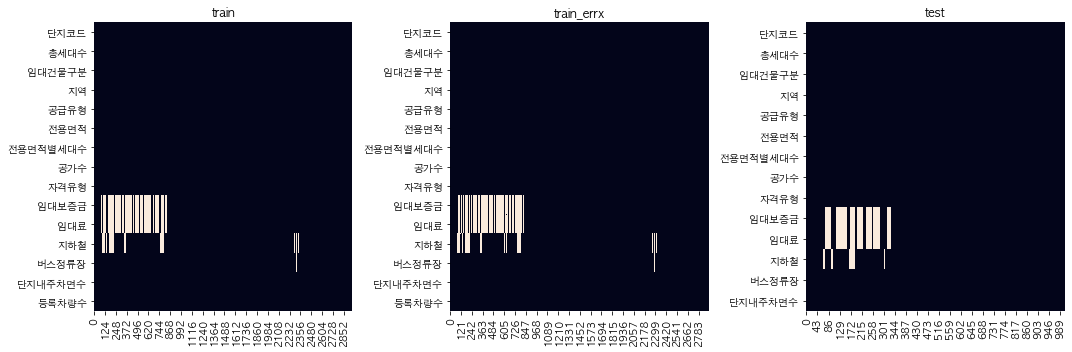

In [5]:
# 결측치 확인 시각화
fig = plt.figure(figsize=(15,5))
plt.subplot(131)
sns.heatmap(train.isnull().T, cbar=False)
plt.title("train")
plt.subplot(132)
sns.heatmap(train_errx.isnull().T, cbar=False)
plt.title("train_errx")
plt.subplot(133)
sns.heatmap(test.isnull().T, cbar=False)
plt.title("test")
plt.tight_layout()

In [6]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         211
버스정류장         4
단지내주차면수       0
등록차량수         0
dtype: int64

In [7]:
train_errx.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         211
버스정류장         4
단지내주차면수       0
등록차량수         0
dtype: int64

In [8]:
test.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       180
임대료         180
지하철          38
버스정류장         0
단지내주차면수       0
dtype: int64

### 자격유형 결측치 처리

In [9]:
test[test["자격유형"].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [10]:
null_grp = test.groupby(["단지코드"])
grp1 = null_grp.get_group(('C2411'))
grp2 = null_grp.get_group(('C2253'))

grp1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [11]:
grp2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,NaN,NaN,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,NaN,NaN,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,NaN,NaN,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0


In [12]:
test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test[test["자격유형"].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수


### 버스정류장 결측치 처리
- train 셋

In [13]:
null_idx = train[train['버스정류장'].isnull()].index
print(null_idx)
train[train['버스정류장'].isnull()]

Int64Index([2315, 2316, 2317, 2318], dtype='int64')


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수
2315,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,1214.0
2316,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2317,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2318,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0


In [14]:
train[train['단지코드']=='N2431']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수
2315,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,1214.0
2316,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2317,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2318,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2372,N2431,1047,아파트,경상남도,국민임대,36.77,272,16.0,A,11217000,233330,0.0,2.0,1066.0,1214.0
2373,N2431,1047,아파트,경상남도,국민임대,46.78,200,16.0,A,24389000,303220,0.0,2.0,1066.0,1214.0


In [15]:
train.loc[null_idx,"버스정류장"] = 2
train[train['버스정류장'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수


- train_errx 셋

In [16]:
null_idx_errx = train_errx[train_errx['버스정류장'].isnull()].index
print(null_idx_errx)
train_errx[train_errx['버스정류장'].isnull()]

Int64Index([2293, 2294, 2295, 2296], dtype='int64')


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,1214.0
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0


In [17]:
train_errx[train_errx['단지코드']=='N2431']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,1214.0
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2350,N2431,1047,아파트,경상남도,국민임대,36.77,272,16.0,A,11217000,233330,0.0,2.0,1066.0,1214.0
2351,N2431,1047,아파트,경상남도,국민임대,46.78,200,16.0,A,24389000,303220,0.0,2.0,1066.0,1214.0


In [18]:
train_errx.loc[null_idx_errx,"버스정류장"] = 2
train_errx[train_errx['버스정류장'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수


*일단 train, test 데이터셋 먼저!, 나중에 train_errx 데이터셋 추가*

## 원핫인코딩
### train, train_errx, test 데이터셋 합치기

In [19]:

print(train.drop("등록차량수",axis=1).shape, train_errx.drop("등록차량수",axis=1).shape, test.shape)

all_df = pd.concat([train.drop("등록차량수",axis=1), train_errx.drop("등록차량수", axis=1), test])
all_df.reset_index( drop=True, inplace=True)
print(all_df.shape)
all_df

(2952, 14) (2896, 14) (1008, 14)
(6856, 14)


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
6852,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
6853,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
6854,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


### 방법1. pandas.get_dummies 사용
- 장점 : 간편하다
- 단점 : 인코딩의 기준을 저장한 객체가 남지 않는다. 새로운 데이터가 들어오면 기존의 데이터와 한꺼번에 실행해야한다. Encoder 객체를 저장할 경우 새로운 데이터만 돌려서 합치면 된다.

In [20]:
col = ['임대건물구분','지역',"공급유형","자격유형"]
col_dummies = pd.get_dummies(all_df[col])
print(type(col_dummies))
print(col_dummies.shape)
col_dummies

<class 'pandas.core.frame.DataFrame'>
(6856, 43)


,임대건물구분_상가,임대건물구분_아파트,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,...,자격유형_F,자격유형_G,자격유형_H,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_O
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6852,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6853,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6854,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 방법2. sklearn.preprocessing.OneHotEncoder 사용
- 주의할 점 : 원핫 인코더로 변환하기 전에 라벨인코더를 통해 모든 문자열이 숫자형 값으로 변환되어야 한다.
#### test : '임대건물구분' 하나만 

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# col = ['임대건물구분','지역',"공급유형","자격유형"]
col = '임대건물구분'

lb_encoder =LabelEncoder()
lb_encoder.fit(all_df[col]) # 1. encoder 객체가 데이터를 학습
lbs = lb_encoder.transform(all_df[col]) # 2. 학습한 기준으로 레이블링
lbs = lbs.reshape(-1,1) # 3. OneHotEncoder에 입력하기 위해 reshape
# lbs = lb_encoder.fit_transform(all_df[col]).reshape(-1,1) # 위의 1~3 과정을 한꺼번에

oh_encoder = OneHotEncoder()
oh_encoder.fit(lbs)  # 1. encoder 객체가 데이터를 학습
ohs = oh_encoder.transform(lbs) # 2. 학습한 기준으로 레이블링
# ohs = oh_encoder.fit_transform(lbs).toarray() # 위의 1~2 과정을 한번에 + array 형태로 변경

print(type(ohs))
print(ohs.shape)
print(ohs.toarray())
ohs = ohs.toarray()

<class 'scipy.sparse.csr.csr_matrix'>
(6856, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [22]:
# 원핫인코딩 확인
print(np.unique(ohs[:,0], return_counts=True))
print(all_df[col].value_counts())

(array([0., 1.]), array([5555, 1301]))
아파트    5555
상가     1301
Name: 임대건물구분, dtype: int64


In [23]:
# all_df 데이터 프레임에 추가하기
pd.concat([all_df, pd.DataFrame(ohs)], axis=1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,0,1
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,0.0,1.0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,0.0,1.0
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,0.0,1.0
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,0.0,1.0
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,0.0,1.0
6852,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,0.0,1.0
6853,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,0.0,1.0
6854,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,0.0,1.0


#### '임대건물구분','지역',"공급유형","자격유형" 모두
- 라벨 인코딩 추가 
```
all_df[col + "_lb"] = lbs
```

- 원핫 인코딩으로 나온 칼럼들 이름 설정해주기 위해서 LabelEncoder.classes 사용
```
col_names = lb_encoder.classes_
col_dict = {idx : name for idx, name in enumerate(col_names)} 
```

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

cols = ['임대건물구분','지역',"공급유형","자격유형"]
for col in cols :

    lb_encoder =LabelEncoder()
    lbs = lb_encoder.fit_transform(all_df[col])
    
    all_df[col + "_lb"] = lbs # all_df에 col+'_lb' 열 추가
    lbs = lbs.reshape(-1,1) 
    col_names = lb_encoder.classes_
    col_dict = {idx : name for idx, name in enumerate(col_names)} # all_df 칼럼명 설정하기 위해 dict 형태로 저장
    print(col_dict) 
    
    oh_encoder = OneHotEncoder()
    ohs = oh_encoder.fit_transform(lbs).toarray() 
    
    all_df = pd.concat([all_df, pd.DataFrame(ohs)], axis=1)
    all_df.rename(columns=col_dict, inplace=True)
    
print(all_df.columns)
all_df

{0: '상가', 1: '아파트'}
{0: '강원도', 1: '경기도', 2: '경상남도', 3: '경상북도', 4: '광주광역시', 5: '대구광역시', 6: '대전광역시', 7: '부산광역시', 8: '서울특별시', 9: '세종특별자치시', 10: '울산광역시', 11: '전라남도', 12: '전라북도', 13: '제주특별자치도', 14: '충청남도', 15: '충청북도'}
{0: '공공분양', 1: '공공임대(10년)', 2: '공공임대(50년)', 3: '공공임대(5년)', 4: '공공임대(분납)', 5: '국민임대', 6: '영구임대', 7: '임대상가', 8: '장기전세', 9: '행복주택'}
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O'}
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '임대건물구분_lb', '상가',
       '아파트', '지역_lb', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '공급유형_lb', '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,F,G,H,I,J,K,L,M,N,O
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6852,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6853,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6854,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### train, train_errx, test 셋으로 분리
- 각각 (2952, :) (2896, :) (1008, :)으로

In [25]:
train_df = all_df.iloc[:2952, :]
train_errx_df = all_df.iloc[2952:5848, :]
test_df = all_df.iloc[5848:, :]

# 인덱스 재설정
train_df.reset_index(drop=True, inplace=True)
train_errx_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.shape, train_errx_df.shape, test_df.shape

((2952, 61), (2896, 61), (1008, 61))

In [26]:
# 등록차량수 칼럼 합치기
train_df = pd.concat([train_df,train["등록차량수"]], axis=1)
train_errx_df = pd.concat([train_errx_df, train_errx['등록차량수']], axis=1)

train_df.shape, train_errx_df.shape

((2952, 62), (2896, 62))

## csv 파일로 저장

In [27]:
train_df.to_csv(path + "train_preprocessed.csv", index=False)
train_errx_df.to_csv(path + "train_errx_preprocessed.csv", index=False)
test_df.to_csv(path + "test_preprocessed.csv", index=False)

os.listdir(path)

['age_gender_info.csv',
 '.DS_Store',
 'test_df.csv',
 'test.csv',
 'test_preprocessed.csv',
 'train_errx_preprocessed.csv',
 'train_df_errx.csv',
 'train.csv',
 'train_preprocessed.csv',
 'train_df.csv',
 'sample_submission.csv']